In [1]:
#Linear Decision Boundary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
raw_data = loadmat('ex6data1.mat')

In [3]:
raw_data

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

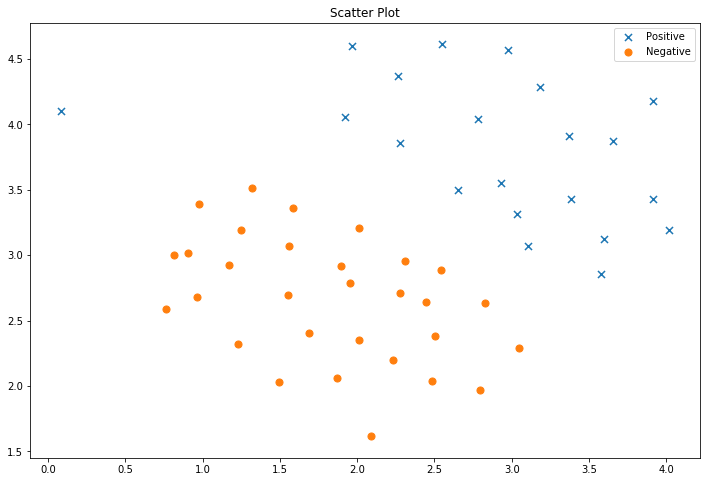

In [10]:
data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'],marker='x', s=50, label='Positive')
ax.scatter(negative['X1'], negative['X2'],marker='o',s=50,  label='Negative')
ax.set_title('Scatter Plot')
ax.legend()

In [11]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter = 1000)

In [12]:
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [17]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [29]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter = 1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

Text(0.5,1,u'SVM (C=1) Decision Confidence')

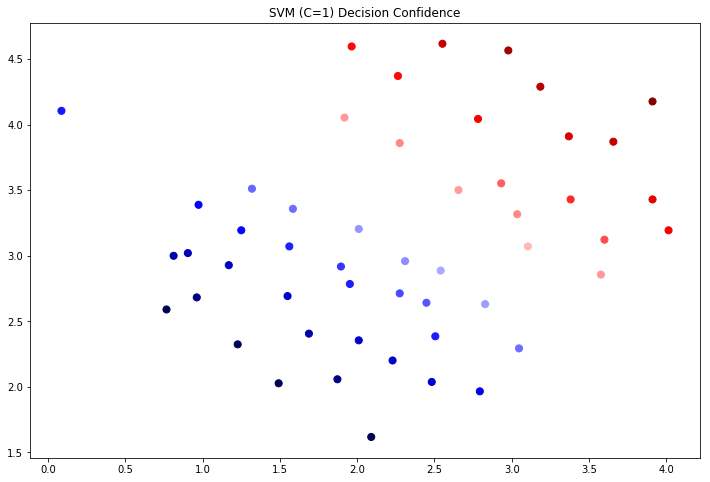

In [30]:
#The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5,1,u'SVM (C=100) Decision Confidence')

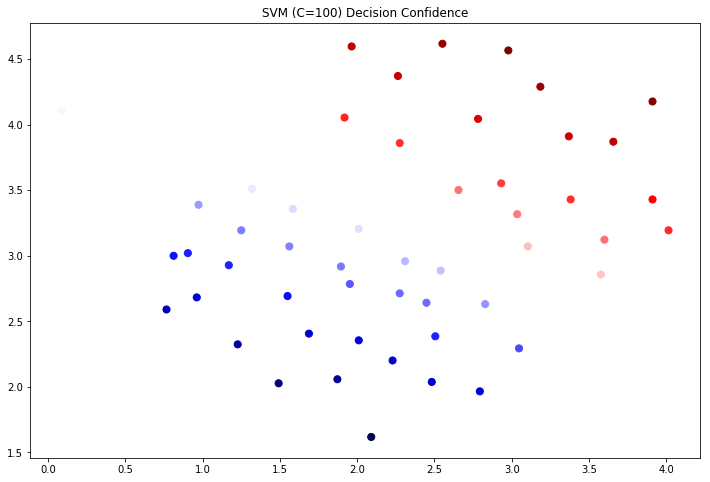

In [32]:
#The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

In [38]:
#Gaussian Kernel 

def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2)**2)/(2 * (sigma ** 2))))
                  
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

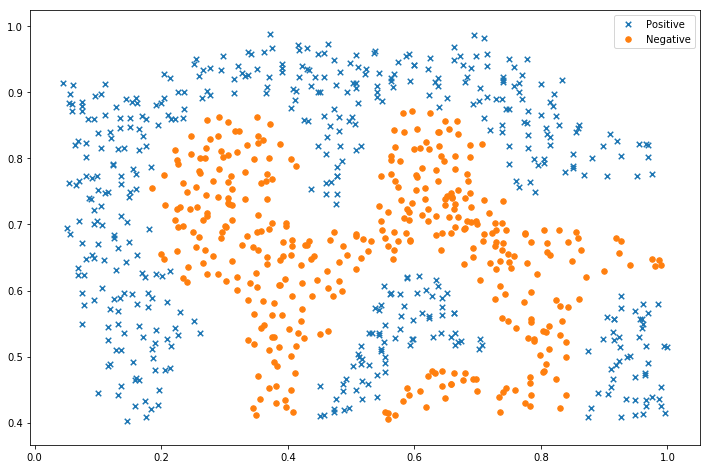

In [40]:
#Non Linear Decision Boundary 
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

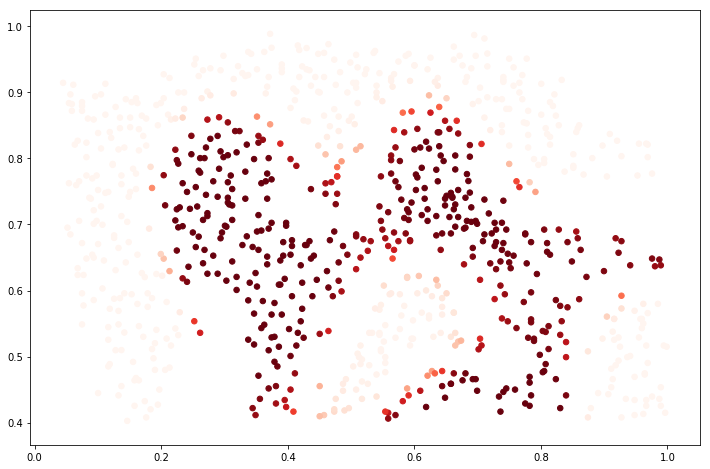

In [44]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:, 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c = data['Probability'], cmap='Reds')


In [50]:
#To find optimal hyper-parameters for an SVM model based on validation set performance

In [51]:
raw_data = loadmat('ex6data3.mat')

In [53]:
X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C':None, 'gamma':None  }

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval , yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
        
best_score, best_params
            
            
            

(0.965, {'C': 0.3, 'gamma': 100})

In [54]:
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')

In [55]:
spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [57]:
X = spam_train['X']
Xtest= spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape , Xtest.shape, y.shape, ytest.shape

((4000, 1899), (1000, 1899), (4000,), (1000,))

In [58]:
svc = svm.SVC()
svc.fit(X, y)
svc.score(Xtest, ytest)

0.953